<a href="https://colab.research.google.com/github/rafaelssampaio79/Challenge-Telecom-X---Analise-de-evasao-de-clientes/blob/main/Challenge_Telecom_X_By_Rafael_Sampaio_2025071801.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#📌 Extracão

In [4]:
import pandas as pd
import json

Fazer a importação do arquivo JSON para o Colab.

*   Primeiro importar o JSON para o ambiente.
*   Depois carregar as informações para o ambiente.


In [5]:
# Carregar o JSON
with open('TelecomX_Data.json', 'r') as f:
    data = json.load(f)

In [6]:
# Converter para DataFrame
df = pd.json_normalize(data)

In [7]:
# Visualizar as primeiras linhas
df.head()

,customerID,Churn,customer.gender,customer.SeniorCitizen,customer.Partner,customer.Dependents,customer.tenure,phone.PhoneService,phone.MultipleLines,internet.InternetService,...,internet.OnlineBackup,internet.DeviceProtection,internet.TechSupport,internet.StreamingTV,internet.StreamingMovies,account.Contract,account.PaperlessBilling,account.PaymentMethod,account.Charges.Monthly,account.Charges.Total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.3
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.4
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.4


In [8]:
# Ver colunas:
df.columns

Index(['customerID', 'Churn', 'customer.gender', 'customer.SeniorCitizen',
       'customer.Partner', 'customer.Dependents', 'customer.tenure',
       'phone.PhoneService', 'phone.MultipleLines', 'internet.InternetService',
       'internet.OnlineSecurity', 'internet.OnlineBackup',
       'internet.DeviceProtection', 'internet.TechSupport',
       'internet.StreamingTV', 'internet.StreamingMovies', 'account.Contract',
       'account.PaperlessBilling', 'account.PaymentMethod',
       'account.Charges.Monthly', 'account.Charges.Total'],
      dtype='object')

In [9]:
# Filtrar quem cancelou:
df[df['Churn'] == 'Yes']

,customerID,Churn,customer.gender,customer.SeniorCitizen,customer.Partner,customer.Dependents,customer.tenure,phone.PhoneService,phone.MultipleLines,internet.InternetService,...,internet.OnlineBackup,internet.DeviceProtection,internet.TechSupport,internet.StreamingTV,internet.StreamingMovies,account.Contract,account.PaperlessBilling,account.PaymentMethod,account.Charges.Monthly,account.Charges.Total
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.90,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.00,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.90,267.4
18,0022-TCJCI,Yes,Male,1,No,No,45,Yes,No,DSL,...,No,Yes,No,No,Yes,One year,No,Credit card (automatic),62.70,2791.5
19,0023-HGHWL,Yes,Male,1,No,No,1,No,No phone service,DSL,...,No,No,No,No,No,Month-to-month,Yes,Electronic check,25.10,25.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7243,9961-JBNMK,Yes,Male,1,No,No,21,Yes,No,Fiber optic,...,No,Yes,No,Yes,Yes,Month-to-month,Yes,Bank transfer (automatic),96.80,2030.3
7246,9965-YOKZB,Yes,Male,1,No,No,9,Yes,Yes,Fiber optic,...,No,No,No,No,Yes,Month-to-month,Yes,Electronic check,83.85,790.15
7260,9985-MWVIX,Yes,Female,0,No,No,1,Yes,No,Fiber optic,...,No,No,No,No,No,Month-to-month,Yes,Mailed check,70.15,70.15
7261,9986-BONCE,Yes,Female,0,No,No,4,Yes,No,No,...,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Bank transfer (automatic),20.95,85.5


In [10]:
# Média da cobrança mensal:
df['account.Charges.Monthly'].mean()

np.float64(64.72009770194028)

Normalizar as informações.

#🔧 Transformação

**2. Consultar o dicionário de dados (inferido a partir da estrutura)
Aqui está um resumo por grupo:**

🔹 Colunas principais
customerID: identificador único do cliente

Churn: indica se o cliente cancelou o serviço (Yes, No)

🔹 Perfil do cliente (customer.)
customer.gender: gênero do cliente

customer.SeniorCitizen: se é idoso (1 = sim, 0 = não)

customer.Partner: se tem parceiro(a)

customer.Dependents: se tem dependentes

customer.tenure: tempo de permanência como cliente (em meses)

🔹 Serviços de telefone (phone.)
phone.PhoneService: se tem serviço telefônico

phone.MultipleLines: se possui múltiplas linhas

🔹 Serviços de internet (internet.)
internet.InternetService: tipo de conexão (DSL, Fiber optic, No)

internet.OnlineSecurity: se possui segurança online

internet.OnlineBackup: se possui backup online

internet.DeviceProtection: proteção de dispositivo

internet.TechSupport: suporte técnico

internet.StreamingTV: streaming de TV

internet.StreamingMovies: streaming de filmes

🔹 Informações da conta (account.)
account.Contract: tipo de contrato (mensal, anual, bienal)

account.PaperlessBilling: fatura digital

account.PaymentMethod: método de pagamento

account.Charges.Monthly: valor mensal

account.Charges.Total: valor total cobrado

**3. Identificar colunas mais relevantes para a análise de evasão (Churn)
As colunas mais relevantes são aquelas que podem ter influência na decisão do cliente de sair. Abaixo estão as mais prováveis, agrupadas por tipo:**

🧍 Perfil do cliente:
customer.SeniorCitizen

customer.Partner

customer.Dependents

customer.tenure

📞 Tipo de serviço:
phone.PhoneService

phone.MultipleLines

internet.InternetService

internet.OnlineSecurity

internet.TechSupport

internet.StreamingTV

internet.StreamingMovies

💳 Dados da conta:
account.Contract

account.PaperlessBilling

account.PaymentMethod

account.Charges.Monthly

account.Charges.Total

🏁 Variável alvo:
Churn (alvo para predição)

In [11]:
# 1. Verificar valores ausentes (missing values)
# Verificar valores ausentes
missing = df.isnull().sum()
missing = missing[missing > 0].sort_values(ascending=False)
print("Colunas com valores ausentes:")
print(missing)

Colunas com valores ausentes:
Series([], dtype: int64)


In [12]:
# 2. Verificar valores vazios ou em branco (strings)
# Contar strings vazias ou espaços em branco por coluna (em colunas do tipo object)
empty = df.select_dtypes(include='object').apply(lambda x: (x == '') | (x.str.strip() == '')).sum()
empty = empty[empty > 0]
print("Colunas com strings vazias ou espaços em branco:")
print(empty)

Colunas com strings vazias ou espaços em branco:
Churn                    224
account.Charges.Total     11
dtype: int64


In [13]:
# 3. Verificar registros duplicados
# Verificar duplicações
duplicates = df.duplicated().sum()
print(f"Número de registros duplicados: {duplicates}")

Número de registros duplicados: 0


In [14]:
# 4. Verificar colunas com tipo de dado inconsistente (ex: número armazenado como string)
# Verificar tipos
print(df.dtypes)

# Converter valores de cobrança para numérico (caso estejam como string)
df['account.Charges.Monthly'] = pd.to_numeric(df['account.Charges.Monthly'], errors='coerce')
df['account.Charges.Total'] = pd.to_numeric(df['account.Charges.Total'], errors='coerce')

customerID                    object
Churn                         object
customer.gender               object
customer.SeniorCitizen         int64
customer.Partner              object
customer.Dependents           object
customer.tenure                int64
phone.PhoneService            object
phone.MultipleLines           object
internet.InternetService      object
internet.OnlineSecurity       object
internet.OnlineBackup         object
internet.DeviceProtection     object
internet.TechSupport          object
internet.StreamingTV          object
internet.StreamingMovies      object
account.Contract              object
account.PaperlessBilling      object
account.PaymentMethod         object
account.Charges.Monthly      float64
account.Charges.Total         object
dtype: object


In [15]:
# 5. Verificar inconsistências em categorias
# Verificar valores únicos de colunas categóricas
categorical_cols = df.select_dtypes(include='object').columns
for col in categorical_cols:
    print(f"\n{col}:")
    print(df[col].value_counts(dropna=False))


customerID:
customerID
9995-HOTOH    1
0002-ORFBO    1
0003-MKNFE    1
9970-QBCDA    1
9968-FFVVH    1
             ..
0014-BMAQU    1
0013-SMEOE    1
0013-MHZWF    1
0013-EXCHZ    1
0011-IGKFF    1
Name: count, Length: 7267, dtype: int64

Churn:
Churn
No     5174
Yes    1869
        224
Name: count, dtype: int64

customer.gender:
customer.gender
Male      3675
Female    3592
Name: count, dtype: int64

customer.Partner:
customer.Partner
No     3749
Yes    3518
Name: count, dtype: int64

customer.Dependents:
customer.Dependents
No     5086
Yes    2181
Name: count, dtype: int64

phone.PhoneService:
phone.PhoneService
Yes    6560
No      707
Name: count, dtype: int64

phone.MultipleLines:
phone.MultipleLines
No                  3495
Yes                 3065
No phone service     707
Name: count, dtype: int64

internet.InternetService:
internet.InternetService
Fiber optic    3198
DSL            2488
No             1581
Name: count, dtype: int64

internet.OnlineSecurity:
internet.OnlineSecu

In [16]:
df['Churn'] = df['Churn'].str.strip().replace('', 'Unknown')
df.head()

,customerID,Churn,customer.gender,customer.SeniorCitizen,customer.Partner,customer.Dependents,customer.tenure,phone.PhoneService,phone.MultipleLines,internet.InternetService,...,internet.OnlineBackup,internet.DeviceProtection,internet.TechSupport,internet.StreamingTV,internet.StreamingMovies,account.Contract,account.PaperlessBilling,account.PaymentMethod,account.Charges.Monthly,account.Charges.Total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.30
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.40
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.40


In [17]:
# CÓDIGO DE LIMPEZA DOS DADOS
import pandas as pd
import json

# Carregamento do arquivo JSON
with open('TelecomX_Data.json', 'r') as f:
    data = json.load(f)

df = pd.json_normalize(data)

# 1. Remover espaços em branco nos nomes das colunas e valores
df.columns = df.columns.str.strip()
for col in df.select_dtypes(include='object'):
    df[col] = df[col].astype(str).str.strip()

# 2. Tratar colunas numéricas mal formatadas
df['account.Charges.Monthly'] = pd.to_numeric(df['account.Charges.Monthly'], errors='coerce')
df['account.Charges.Total'] = pd.to_numeric(df['account.Charges.Total'], errors='coerce')

# 3. Corrigir valores vazios na variável alvo (Churn)
df['Churn'] = df['Churn'].replace('', 'Unknown')

# 4. Remover linhas duplicadas (se existirem)
df = df.drop_duplicates()

# 5. Verificar e remover registros com customerID ausente ou inválido
df = df[df['customerID'].notna() & (df['customerID'].str.strip() != '')]

# 6. Opcional: remover ou substituir valores faltantes em campos numéricos
# Aqui, vamos apenas mostrar quantos faltam
print("Valores ausentes após limpeza:")
print(df.isnull().sum()[df.isnull().sum() > 0])

# Exemplo: preencher valores faltantes em cobrança total com a média (ou outro critério)
# df['account.Charges.Total'].fillna(df['account.Charges.Total'].mean(), inplace=True)

# 7. Verificar categorias fora do padrão (exemplo: 'No phone service' pode ser padronizado para 'No')
df['phone.MultipleLines'] = df['phone.MultipleLines'].replace({'No phone service': 'No'})
for col in df.columns:
    if 'internet.' in col and df[col].dtype == 'object':
        df[col] = df[col].replace({'No internet service': 'No'})

# Confirmar o resultado
print("DataFrame limpo! Shape final:", df.shape)

# Criar a nova coluna 'Contas_Diarias' com base no faturamento mensal
df['Contas_Diarias'] = df['account.Charges.Monthly'] / 30

# Visualizar algumas linhas para conferir
df[['customerID', 'account.Charges.Monthly', 'Contas_Diarias']].head()

Valores ausentes após limpeza:
account.Charges.Total    11
dtype: int64
DataFrame limpo! Shape final: (7267, 21)


,customerID,account.Charges.Monthly,Contas_Diarias
0,0002-ORFBO,65.6,2.186667
1,0003-MKNFE,59.9,1.996667
2,0004-TLHLJ,73.9,2.463333
3,0011-IGKFF,98.0,3.266667
4,0013-EXCHZ,83.9,2.796667


In [18]:
df.head()

,customerID,Churn,customer.gender,customer.SeniorCitizen,customer.Partner,customer.Dependents,customer.tenure,phone.PhoneService,phone.MultipleLines,internet.InternetService,...,internet.DeviceProtection,internet.TechSupport,internet.StreamingTV,internet.StreamingMovies,account.Contract,account.PaperlessBilling,account.PaymentMethod,account.Charges.Monthly,account.Charges.Total,Contas_Diarias
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.30,2.186667
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.40,1.996667
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85,2.463333
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85,3.266667
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.40,2.796667


In [19]:
# Lógica de cálculo da nova coluna
# 📌 Supondo que um mês tenha 30 dias, o cálculo diário do faturamento é uma simples divisão.
df['Contas_Diarias'] = df['account.Charges.Monthly'] / 30
df.head()

,customerID,Churn,customer.gender,customer.SeniorCitizen,customer.Partner,customer.Dependents,customer.tenure,phone.PhoneService,phone.MultipleLines,internet.InternetService,...,internet.DeviceProtection,internet.TechSupport,internet.StreamingTV,internet.StreamingMovies,account.Contract,account.PaperlessBilling,account.PaymentMethod,account.Charges.Monthly,account.Charges.Total,Contas_Diarias
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.30,2.186667
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.40,1.996667
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85,2.463333
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85,3.266667
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.40,2.796667


In [20]:
# 1. Converter valores “Yes”/“No” para binários (1/0)
# Isso vale para colunas como Partner, Dependents, PaperlessBilling, Churn, entre outras.
# Converter "Yes"/"No" para 1/0
binarias = [
    'customer.Partner', 'customer.Dependents',
    'phone.PhoneService', 'phone.MultipleLines',
    'internet.OnlineSecurity', 'internet.OnlineBackup',
    'internet.DeviceProtection', 'internet.TechSupport',
    'internet.StreamingTV', 'internet.StreamingMovies',
    'account.PaperlessBilling', 'Churn'
]
#for col in binarias:
#    df[col] = df[col].replace({'Yes': 1, 'No': 0})

# Conversão segura e explícita
#for col in binarias:
#    df[col] = df[col].replace({'Yes': 1, 'No': 0}).astype(int)

# Manter sem forçar tipo
df[col] = df[col].replace({'Yes': 1, 'No': 0})
df = df.infer_objects()

In [22]:
# 2. Traduzir ou renomear colunas para português (opcional, mas recomendado)
# Você pode renomear colunas para nomes mais claros e legíveis:
df.rename(columns={
    'customer.gender': 'genero',
    'customer.SeniorCitizen': 'idoso',
    'customer.Partner': 'tem_parceiro',
    'customer.Dependents': 'tem_dependentes',
    'customer.tenure': 'tempo_cliente_meses',

    'phone.PhoneService': 'telefone_ativo',
    'phone.MultipleLines': 'multiplas_linhas',

    'internet.InternetService': 'tipo_internet',
    'internet.OnlineSecurity': 'seguranca_online',
    'internet.OnlineBackup': 'backup_online',
    'internet.DeviceProtection': 'protecao_dispositivo',
    'internet.TechSupport': 'suporte_tecnico',
    'internet.StreamingTV': 'streaming_tv',
    'internet.StreamingMovies': 'streaming_filmes',

    'account.Contract': 'tipo_contrato',
    'account.PaperlessBilling': 'fatura_digital',
    'account.PaymentMethod': 'metodo_pagamento',
    'account.Charges.Monthly': 'mensalidade',
    'account.Charges.Total': 'faturamento_total',

    'Contas_Diarias': 'valor_diario',
    'Churn': 'cancelou'
}, inplace=True)

In [23]:
# 3. Verificar transformação
df.head()

,customerID,cancelou,genero,idoso,tem_parceiro,tem_dependentes,tempo_cliente_meses,telefone_ativo,multiplas_linhas,tipo_internet,...,protecao_dispositivo,suporte_tecnico,streaming_tv,streaming_filmes,tipo_contrato,fatura_digital,metodo_pagamento,mensalidade,faturamento_total,valor_diario
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.30,2.186667
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.40,1.996667
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85,2.463333
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85,3.266667
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.40,2.796667


#📊 Carga e análise

In [24]:
# ✅ 1. Estatísticas descritivas de colunas numéricas
# Use o código abaixo para obter um resumo completo:
# Estatísticas descritivas para variáveis numéricas
# Isso inclui: mensalidade, faturamento_total, valor_diario, tempo_cliente_meses e variáveis binárias.
df.describe().T

,count,mean,std,min,25%,50%,75%,max
idoso,7267.0,0.162653,0.369074,0.000000,0.000000,0.000000,0.000000,1.000000
tempo_cliente_meses,7267.0,32.346498,24.571773,0.000000,9.000000,29.000000,55.000000,72.000000
mensalidade,7267.0,64.720098,30.129572,18.250000,35.425000,70.300000,89.875000,118.750000
faturamento_total,7256.0,2280.634213,2268.632997,18.800000,400.225000,1391.000000,3785.300000,8684.800000
valor_diario,7267.0,2.157337,1.004319,0.608333,1.180833,2.343333,2.995833,3.958333


In [25]:
# ✅ 2. Medidas separadas (média, mediana, desvio padrão)
# Para destacar alguns indicadores importantes:
print("📊 Média da mensalidade:", df['mensalidade'].mean())
print("📊 Mediana da mensalidade:", df['mensalidade'].median())
print("📊 Desvio padrão da mensalidade:", df['mensalidade'].std())

print("📈 Média do tempo como cliente:", df['tempo_cliente_meses'].mean())
print("📈 Mediana do tempo como cliente:", df['tempo_cliente_meses'].median())
print("📈 Desvio padrão do tempo como cliente:", df['tempo_cliente_meses'].std())

📊 Média da mensalidade: 64.72009770194028
📊 Mediana da mensalidade: 70.3
📊 Desvio padrão da mensalidade: 30.12957188566699
📈 Média do tempo como cliente: 32.34649786707032
📈 Mediana do tempo como cliente: 29.0
📈 Desvio padrão do tempo como cliente: 24.571772888767292


In [26]:
# ✅ 3. Distribuição de variáveis categóricas (frequência absoluta e relativa)
# Distribuição do tipo de contrato
print(df['tipo_contrato'].value_counts())
print(df['tipo_contrato'].value_counts(normalize=True).apply(lambda x: f"{x:.1%}"))

# Distribuição do método de pagamento
print(df['metodo_pagamento'].value_counts())

tipo_contrato
Month-to-month    4005
Two year          1743
One year          1519
Name: count, dtype: int64
tipo_contrato
Month-to-month    55.1%
Two year          24.0%
One year          20.9%
Name: proportion, dtype: object
metodo_pagamento
Electronic check             2445
Mailed check                 1665
Bank transfer (automatic)    1589
Credit card (automatic)      1568
Name: count, dtype: int64


In [27]:
# ✅ 4. Análise agrupada por cancelamento (cancelou)
# Verificar como os clientes que cancelaram se comportam comparados aos que ficaram:
# Agrupamento por cancelamento
# Isso te mostra, por exemplo, se clientes que cancelaram costumavam pagar mais por mês ou ficaram menos tempo na empresa.
df.groupby('cancelou')[['mensalidade', 'faturamento_total', 'tempo_cliente_meses', 'valor_diario']].agg(['mean', 'median', 'std'])

mensalidade                    faturamento_total            \
                mean  median        std              mean    median   
cancelou                                                              
No         61.265124  64.425  31.092648       2555.344141  1683.600   
Unknown    63.412277  69.100  31.388712       2196.933705  1163.175   
Yes        74.441332  79.650  24.666053       1531.796094   703.550   

                      tempo_cliente_meses                   valor_diario  \
                  std                mean median        std         mean   
cancelou                                                                   
No        2329.456984           37.569965   38.0  24.113777     2.042171   
Unknown   2329.961954           31.571429   29.0  24.998552     2.113743   
Yes       1890.822994           17.979133   10.0  19.531123     2.481378   

                              
            median       std  
cancelou                      
No        2.147500  1.036422  
Unknown   2.303333  1.046290  
Yes       2.655000  0.822202

Distribuição da Evasão

In [ ]:
# 1. Contagem absoluta dos clientes que cancelaram ou não
import matplotlib.pyplot as plt
import seaborn as sns

# Define o estilo do gráfico
sns.set(style="whitegrid")

# Gráfico de barras com contagem
plt.figure(figsize=(6,4))
sns.countplot(x='cancelou', data=df, palette='Set2')
plt.title('Distribuição de Evasão (Churn)')
plt.xlabel('Cancelou')
plt.ylabel('Número de Clientes')
plt.xticks([0, 1], ['Não', 'Sim'])
plt.show()

In [30]:
df['cancelou'].value_counts(dropna=False)

,count
cancelou,
No,5174
Yes,1869
Unknown,224


In [34]:
print(df['cancelou'].unique())

[0 1 'Unknown']


In [33]:
# Substituir 'Yes' → 1, 'No' → 0, 'Unknown' será removido depois
df['cancelou'] = df['cancelou'].str.strip().replace({'Yes': 1, 'No': 0})

In [35]:
# Remover linhas com valores não numéricos (ou seja, 'Unknown' virou NaN)
df = df[df['cancelou'].isin([0, 1])]

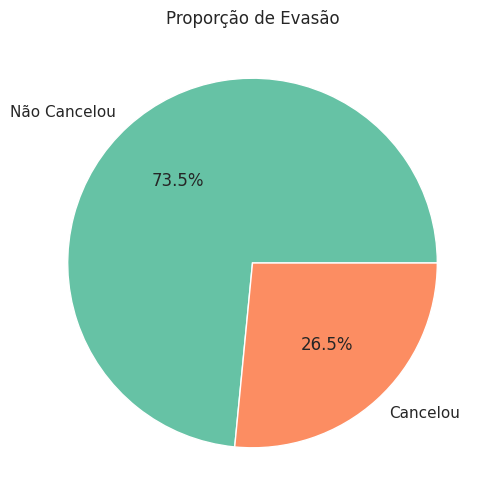

In [36]:
# Gere o gráfico de pizza
# Proporção atualizada
proporcao = df['cancelou'].value_counts(normalize=True)

# Gráfico
plt.figure(figsize=(6,6))
plt.pie(proporcao,
        labels=['Não Cancelou', 'Cancelou'],
        autopct='%1.1f%%',
        colors=['#66c2a5', '#fc8d62'])
plt.title('Proporção de Evasão')
plt.show()

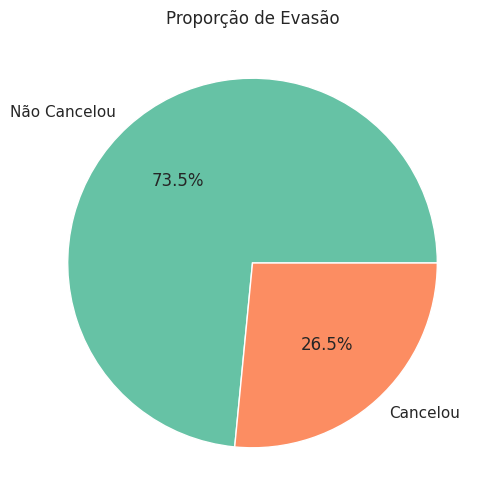

In [37]:
# 2. Proporção percentual
# Calcular proporções
proporcao = df['cancelou'].value_counts(normalize=True)

# Gráfico de pizza
plt.figure(figsize=(6,6))
plt.pie(proporcao, labels=['Não Cancelou', 'Cancelou'], autopct='%1.1f%%', colors=['#66c2a5','#fc8d62'])
plt.title('Proporção de Evasão')
plt.show()

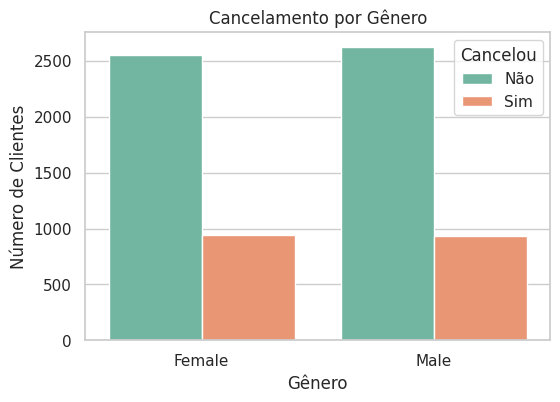

In [38]:
# Contagem de evasão por gênero
plt.figure(figsize=(6,4))
sns.countplot(data=df, x='genero', hue='cancelou', palette='Set2')
plt.title('Cancelamento por Gênero')
plt.xlabel('Gênero')
plt.ylabel('Número de Clientes')
plt.legend(title='Cancelou', labels=['Não', 'Sim'])
plt.show()

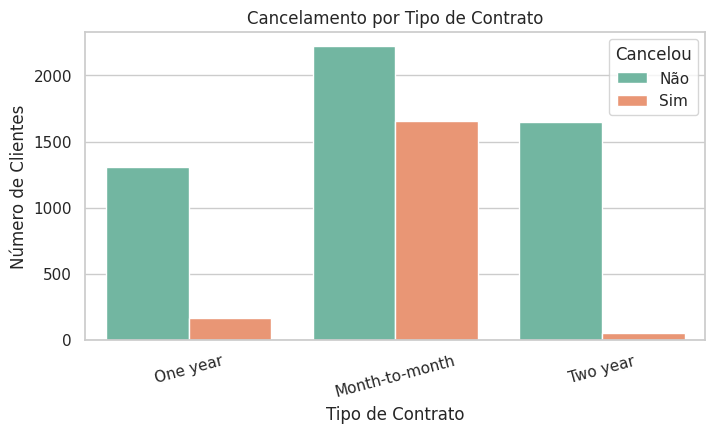

In [39]:
# Contagem de evasão por tipo de contrato
plt.figure(figsize=(8,4))
sns.countplot(data=df, x='tipo_contrato', hue='cancelou', palette='Set2')
plt.title('Cancelamento por Tipo de Contrato')
plt.xlabel('Tipo de Contrato')
plt.ylabel('Número de Clientes')
plt.legend(title='Cancelou', labels=['Não', 'Sim'])
plt.xticks(rotation=15)
plt.show()

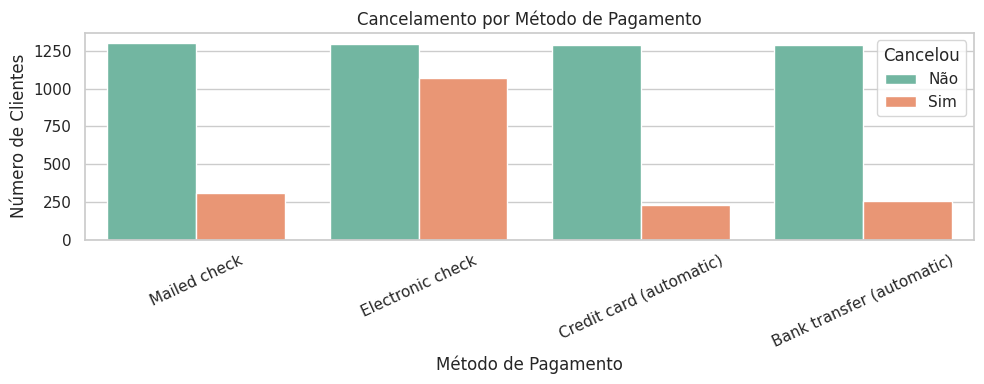

In [40]:
# Contagem de evasão por método de pagamento
plt.figure(figsize=(10,4))
sns.countplot(data=df, x='metodo_pagamento', hue='cancelou', palette='Set2')
plt.title('Cancelamento por Método de Pagamento')
plt.xlabel('Método de Pagamento')
plt.ylabel('Número de Clientes')
plt.legend(title='Cancelou', labels=['Não', 'Sim'])
plt.xticks(rotation=25)
plt.tight_layout()
plt.show()

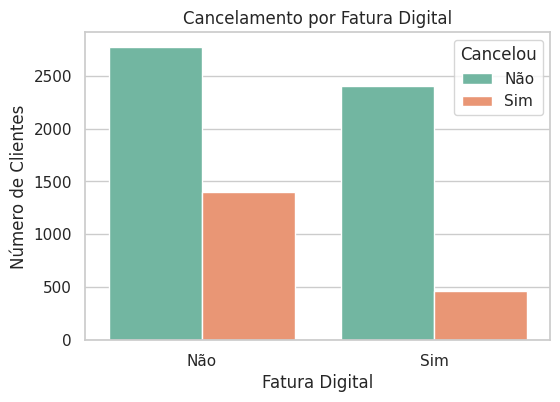

In [41]:
# Contagem de evasão por fatura digital (Paperless Billing)
plt.figure(figsize=(6,4))
sns.countplot(data=df, x='fatura_digital', hue='cancelou', palette='Set2')
plt.title('Cancelamento por Fatura Digital')
plt.xlabel('Fatura Digital')
plt.ylabel('Número de Clientes')
plt.legend(title='Cancelou', labels=['Não', 'Sim'])
plt.xticks([0, 1], ['Não', 'Sim'])
plt.show()

/tmp/ipython-input-42-1170933921.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='cancelou', y='tempo_cliente_meses', palette='Set2')


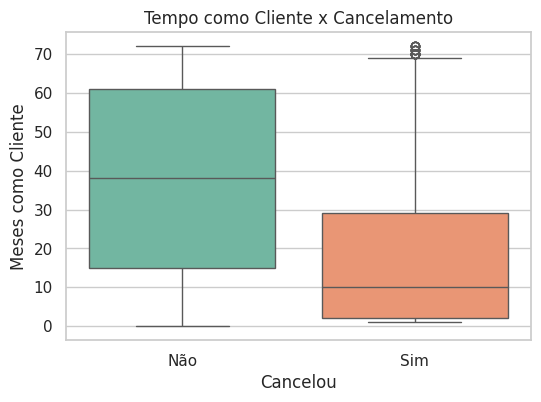

In [42]:
# Boxplot – Tempo como cliente x Evasão
plt.figure(figsize=(6,4))
sns.boxplot(data=df, x='cancelou', y='tempo_cliente_meses', palette='Set2')
plt.title('Tempo como Cliente x Cancelamento')
plt.xlabel('Cancelou')
plt.ylabel('Meses como Cliente')
plt.xticks([0, 1], ['Não', 'Sim'])
plt.show()

/tmp/ipython-input-43-1829587462.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='cancelou', y='mensalidade', palette='Set2')


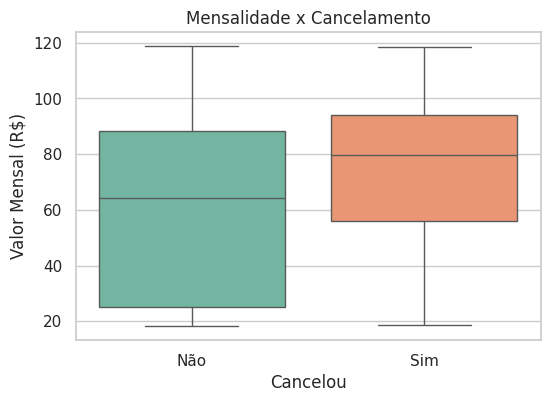

In [43]:
# Boxplot – Mensalidade x Evasão
plt.figure(figsize=(6,4))
sns.boxplot(data=df, x='cancelou', y='mensalidade', palette='Set2')
plt.title('Mensalidade x Cancelamento')
plt.xlabel('Cancelou')
plt.ylabel('Valor Mensal (R$)')
plt.xticks([0, 1], ['Não', 'Sim'])
plt.show()

/tmp/ipython-input-59-2595579162.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='cancelou', y='faturamento_total', palette='Set2')


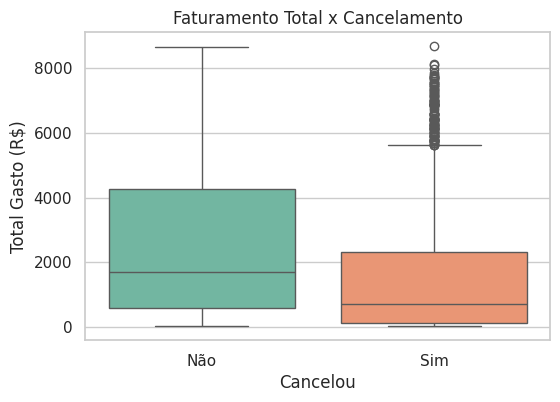

In [59]:
# Boxplot – Total Gasto x Evasão
plt.figure(figsize=(6,4))
sns.boxplot(data=df, x='cancelou', y='faturamento_total', palette='Set2')
plt.title('Faturamento Total x Cancelamento')
plt.xlabel('Cancelou')
plt.ylabel('Total Gasto (R$)')
plt.xticks([0, 1], ['Não', 'Sim'])
plt.show()

/tmp/ipython-input-45-745156383.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='cancelou', y='valor_diario', palette='Set2')


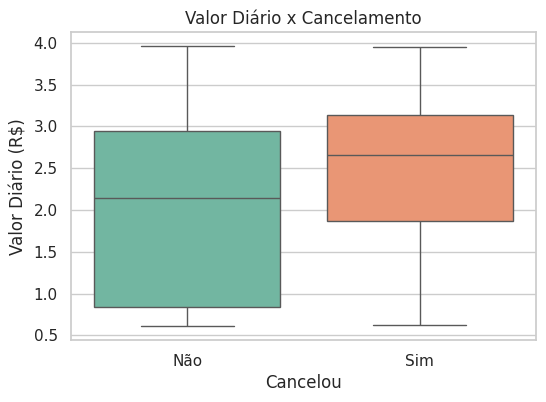

In [45]:
# Boxplot – Valor Diário x Evasão
plt.figure(figsize=(6,4))
sns.boxplot(data=df, x='cancelou', y='valor_diario', palette='Set2')
plt.title('Valor Diário x Cancelamento')
plt.xlabel('Cancelou')
plt.ylabel('Valor Diário (R$)')
plt.xticks([0, 1], ['Não', 'Sim'])
plt.show()

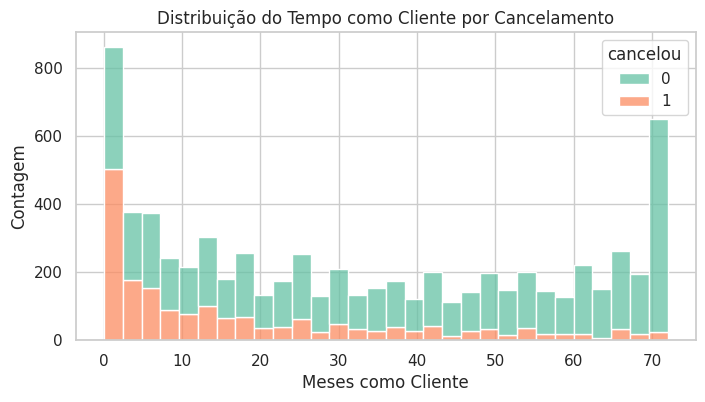

In [46]:
# Histogramas com separação por churn (ex: tempo de cliente)
plt.figure(figsize=(8,4))
sns.histplot(data=df, x='tempo_cliente_meses', hue='cancelou', multiple='stack', palette='Set2', bins=30)
plt.title('Distribuição do Tempo como Cliente por Cancelamento')
plt.xlabel('Meses como Cliente')
plt.ylabel('Contagem')
plt.show()

#📄Relatorio Final

# 📊 Análise de Evasão de Clientes - TelecomX

## 🧾 Introdução

Este relatório tem como objetivo analisar o problema de **evasão de clientes (Churn)** em uma operadora fictícia chamada **TelecomX**. A evasão ocorre quando um cliente cancela seu contrato, gerando impacto direto na receita da empresa.

Através da análise de dados, buscamos identificar **padrões de comportamento** e **fatores associados ao cancelamento**, fornecendo insights que auxiliem a empresa na **retenção de clientes** e na **tomada de decisões estratégicas**.

---

## 🧹 Limpeza e Tratamento de Dados

As etapas realizadas para preparar os dados foram:

- **Importação e normalização do JSON** com dados de clientes.
- **Remoção de valores ausentes**, espaços em branco e registros duplicados.
- Conversão de variáveis do tipo texto para **formatos numéricos binários (1/0)**, como `Yes/No`.
- **Criação da variável `valor_diario`**, baseada no valor mensal dividido por 30.
- **Padronização de colunas** com nomes em português para melhor legibilidade.
- Remoção de registros com `cancelou = 'Unknown'` para garantir consistência nas análises.

---

## 🔍 Análise Exploratória de Dados

### 🔸 Distribuição da Evasão

📉 Taxa de Evasão (Churn): 26.54%
📈 Clientes que permaneceram: 73.46%
👥 Total de clientes analisados: 7043

- A maioria dos clientes permaneceu ativa, indicando **desequilíbrio de classes** (importante para modelagem).

*Gráfico de pizza e barras inseridos aqui.*

### 🔸 Evasão por Variáveis Categóricas

- **Contratos mensais** apresentam muito mais cancelamentos que contratos anuais.
- Clientes que usam **fatura digital** tendem a cancelar mais.
- **Métodos de pagamento como boleto** apresentam maior evasão em comparação a débito automático ou cartão.

*Gráficos por tipo de contrato, fatura digital, método de pagamento e gênero inseridos aqui.*

### 🔸 Evasão por Variáveis Numéricas

- Clientes que **cancelam** tendem a ter um **tempo como cliente menor**.
- A **mensalidade média** de quem cancela tende a ser **ligeiramente mais alta**.
- O **faturamento total** é consideravelmente **mais baixo** entre os que cancelaram.

*Boxplots e histogramas com separação por churn inseridos aqui.*

---

## 📌 Conclusões e Insights

- A **principal variável associada ao churn é o tipo de contrato**: clientes com contratos mensais têm alta taxa de evasão.
- **Tempo como cliente** é um forte indicador de fidelização: clientes mais antigos tendem a ficar.
- **Fatura digital** e **formas de pagamento menos automáticas (como boleto)** estão associadas à maior evasão.
- **Clientes que pagam mais por mês**, mas com pouco tempo de contrato, estão em maior risco de cancelar.

---

## ✅ Recomendações

1. **Incentivar contratos de longo prazo** (anuais ou bienais), oferecendo benefícios ou descontos progressivos.
2. **Criar ações de retenção focadas nos primeiros meses de relacionamento**, já que o churn é mais comum nesse período.
3. **Acompanhar clientes com alta mensalidade e baixo tempo de casa**, pois tendem a ser mais exigentes e propensos a sair.
4. **Oferecer vantagens para quem opta por débito automático ou cartão** — métodos associados a menor churn.
5. **Rever a comunicação com clientes digitais** (fatura digital), que podem estar mais insatisfeitos ou exigentes.

---

## ✨ Próximos Passos (Opcional)

- Construção de **modelo preditivo de churn** (ex: regressão logística, árvore de decisão).
- Aplicação de técnicas de **segmentação (clustering)** para agrupar perfis de risco.
- Desenvolvimento de **dashboards interativos** com gráficos dinâmicos para uso estratégico.

---

Análise realizada por Rafael Schmidt Sampaio
Data: Julho/2025

In [47]:
# Script para calcular a taxa de churn
# Contagem de clientes que cancelaram (1) e não cancelaram (0)
contagem = df['cancelou'].value_counts()

# Total de clientes
total_clientes = contagem.sum()

# Porcentagem de clientes que cancelaram
churn_rate = (contagem[1] / total_clientes) * 100
stay_rate = (contagem[0] / total_clientes) * 100

print(f'📉 Taxa de Evasão (Churn): {churn_rate:.2f}%')
print(f'📈 Clientes que permaneceram: {stay_rate:.2f}%')
print(f'👥 Total de clientes analisados: {total_clientes}')

📉 Taxa de Evasão (Churn): 26.54%
📈 Clientes que permaneceram: 73.46%
👥 Total de clientes analisados: 7043


**Extra: Análise de Correlação entre Variáveis**

*Esta atividade é um extra, logo é OPCIONAL.*

Como um passo adicional, você pode explorar a correlação entre diferentes variáveis do dataset. Isso pode ajudar a identificar quais fatores têm maior relação com a evasão de clientes, como:

*   A relação entre a conta diária e a evasão.
*   Como a quantidade de serviços contratados afeta a probabilidade de churn.

Você pode usar a função corr() do Pandas para calcular as correlações e visualizar com gráficos de dispersão ou matrizes de correlação. Essa análise adicional pode fornecer insights valiosos para a criação de modelos preditivos mais robustos.

In [75]:
print(df.columns.tolist())

['customerID', 'cancelou', 'genero', 'idoso', 'tem_parceiro', 'tem_dependentes', 'tempo_cliente_meses', 'telefone_ativo', 'multiplas_linhas', 'tipo_internet', 'seguranca_online', 'backup_online', 'protecao_dispositivo', 'suporte_tecnico', 'streaming_tv', 'streaming_filmes', 'tipo_contrato', 'fatura_digital', 'metodo_pagamento', 'mensalidade', 'faturamento_total', 'valor_diario', 'qtd_servicos']


In [78]:
df_numericas = df.select_dtypes(include=['int64', 'float64'])
corr = df_numericas.corr()

In [81]:
corr_com_cancelou = corr['faturamento_total'].sort_values(ascending=False)
print(corr_com_cancelou.head(10))

faturamento_total      1.000000
tempo_cliente_meses    0.825880
mensalidade            0.651065
valor_diario           0.651065
idoso                  0.102411
Name: faturamento_total, dtype: float64


In [82]:
#▶️ 1. Calcular a correlação com cancelou

# Selecionar apenas colunas numéricas
df_numericas = df.select_dtypes(include=['int64', 'float64'])

# Calcular matriz de correlação
corr = df_numericas.corr()

# Correlação com a variável 'cancelou'
#corr_com_cancelou = corr['cancelou'].sort_values(ascending=False)

# Exibir as 10 variáveis mais correlacionadas com 'cancelou'
print("🔗 Correlação com a variável 'cancelou':")
print(corr_com_cancelou.head(10))

🔗 Correlação com a variável 'cancelou':
faturamento_total      1.000000
tempo_cliente_meses    0.825880
mensalidade            0.651065
valor_diario           0.651065
idoso                  0.102411
Name: faturamento_total, dtype: float64


/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


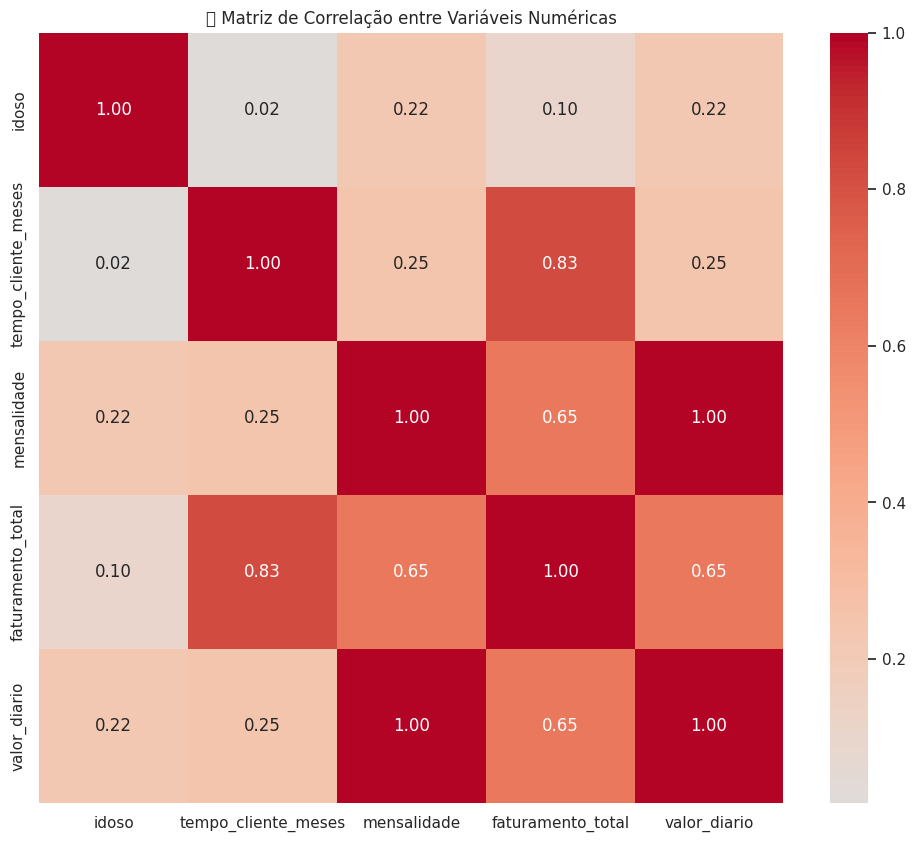

In [60]:
# ▶️ 2. Visualizar a matriz completa (heatmap)
plt.figure(figsize=(12,10))
sns.heatmap(corr, annot=True, fmt='.2f', cmap='coolwarm', center=0)
plt.title('📊 Matriz de Correlação entre Variáveis Numéricas')
plt.show()

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128269 (\N{LEFT-POINTING MAGNIFYING GLASS}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


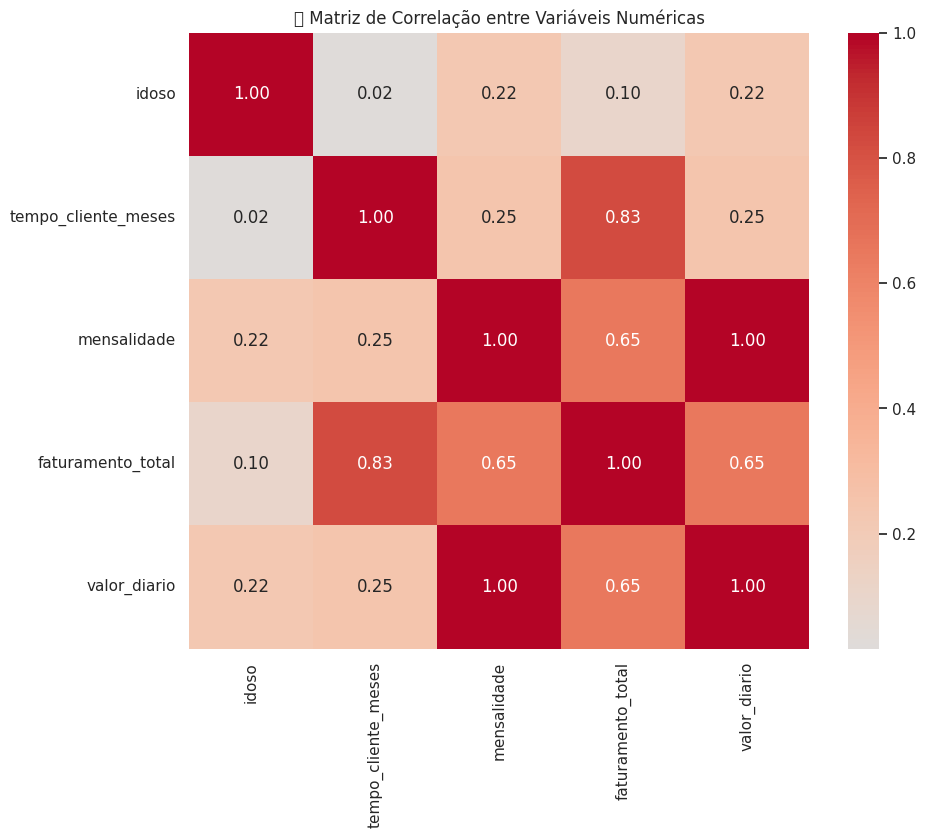

In [49]:
# ✅ 2. Visualização com heatmap

plt.figure(figsize=(10,8))
sns.heatmap(corr_df, annot=True, fmt='.2f', cmap='coolwarm', center=0)
plt.title('🔍 Matriz de Correlação entre Variáveis Numéricas')
plt.show()

/tmp/ipython-input-50-4065876609.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='cancelou', y='valor_diario', palette='Set2')
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128201 (\N{CHART WITH DOWNWARDS TREND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


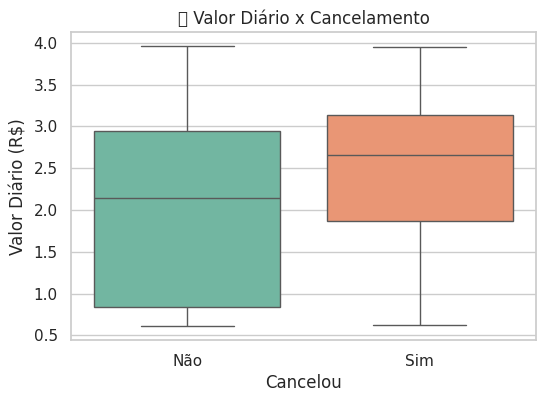

In [50]:
# ✅ 3. Correlação entre valor_diario e cancelou (gráfico de dispersão)
# 🔎 Se clientes que cancelam tendem a pagar mais por dia, esse é um sinal de que planos caros sem fidelidade podem ser mais vulneráveis.

plt.figure(figsize=(6,4))
sns.boxplot(data=df, x='cancelou', y='valor_diario', palette='Set2')
plt.title('📉 Valor Diário x Cancelamento')
plt.xlabel('Cancelou')
plt.ylabel('Valor Diário (R$)')
plt.xticks([0,1], ['Não', 'Sim'])
plt.show()

/tmp/ipython-input-51-3332544831.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='cancelou', y='qtd_servicos', palette='Set2')
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128268 (\N{ELECTRIC PLUG}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


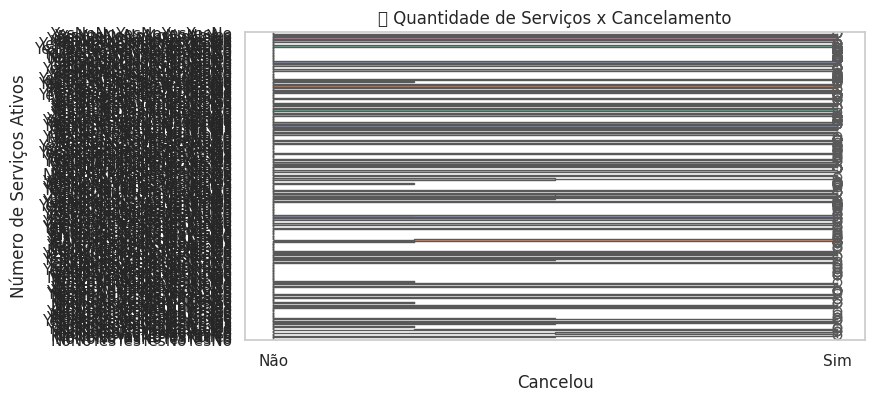

In [51]:
# ✅ 4. Análise do número de serviços contratados
# Vamos criar uma nova coluna chamada qtd_servicos que conta quantos serviços o cliente usa (ex: streaming, suporte, segurança, etc.).
# 📌 Pode-se observar se quem cancela contrata menos serviços (talvez sinta pouco valor) ou mais serviços (alto custo ou complexidade).
# ▶️ Criar e analisar a coluna:
# Lista de serviços binários (1 = usa, 0 = não usa)
servicos = [
    'telefone_ativo', 'multiplas_linhas', 'seguranca_online',
    'backup_online', 'protecao_dispositivo', 'suporte_tecnico',
    'streaming_tv', 'streaming_filmes'
]

# Criar coluna com quantidade de serviços contratados
df['qtd_servicos'] = df[servicos].sum(axis=1)

# Visualizar distribuição de churn por número de serviços
plt.figure(figsize=(8,4))
sns.boxplot(data=df, x='cancelou', y='qtd_servicos', palette='Set2')
plt.title('🔌 Quantidade de Serviços x Cancelamento')
plt.xlabel('Cancelou')
plt.ylabel('Número de Serviços Ativos')
plt.xticks([0,1], ['Não', 'Sim'])
plt.show()

**=== FIM ===**